<a href="https://colab.research.google.com/github/utkuyucel/Dj/blob/main/Discord_DD_K%C3%BCf%C3%BCr_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [ ]:
df = pd.read_csv("bully.csv")
df.head()

,message,cyberbullying
0,rabbim kalan ömrünü geçen ömründen hayırlı eyl...,0
1,bir ateist olarak bu resmi gördükçe gözyaşları...,0
2,oo süpersin azıcık bize de bulaşsa,0
3,bende biliyorum benden bı bok olmicak,1
4,nerdesin len tirrek,1


In [ ]:
df2 = pd.read_csv("kufur.csv", usecols = ["text", "label"])
df2 = df2.rename(columns = {"text":"message", "label":"cyberbullying"})
df2.head()

,message,cyberbullying
0,@USER06095 Hırsız demişken Tuncay sizin şu 1.2...,1
1,Ne bileyim sen hastayım deyince bende veterine...,0
2,Akşam eve gittiğimizde yorgunluğuma iyi gelece...,1
3,Kook’un sesini 18381 kez dinledikten sonra eğe...,0
4,@USER05270 @USER04816 o macta adam 6 7 tane ne...,1


In [ ]:
df = pd.concat([df, df2])
df.head()

,message,cyberbullying
0,rabbim kalan ömrünü geçen ömründen hayırlı eyl...,0
1,bir ateist olarak bu resmi gördükçe gözyaşları...,0
2,oo süpersin azıcık bize de bulaşsa,0
3,bende biliyorum benden bı bok olmicak,1
4,nerdesin len tirrek,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


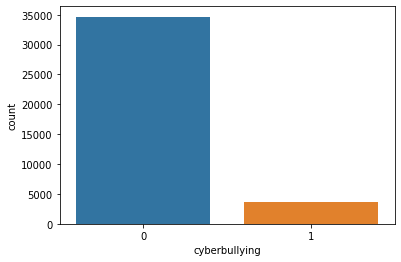

In [ ]:
sns.countplot(df["cyberbullying"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38285 entries, 0 to 35283
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   message        38285 non-null  object
 1   cyberbullying  38285 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [ ]:
den1 = (df["cyberbullying"] == 0).sum()
den2 = (df["cyberbullying"] == 1).sum()

den2/den1 #FINE

0.10423697037870266

In [ ]:
import string

punc = string.punctuation

In [ ]:
def remove_punc(text):
  x = "".join([i for i in text if i not in punc])
  return x

In [ ]:
X = df.message.astype(str)
Y = df.cyberbullying

In [ ]:
X = X.apply(remove_punc)

In [ ]:
X[0]

0    rabbim kalan ömrünü geçen ömründen hayırlı eyl...
0    USER06095 Hırsız demişken Tuncay sizin şu 1200...
Name: message, dtype: object

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01)

In [ ]:
X_train

24066       USER07267 Baya açıklama yaptım ya çok saçmayım
16731    USER10319 Eskiden bende yapıyordum yolculuğa ç...
19164    3gün önce baktığım AnkaraKıbrıs bileti dün bak...
30361    Acil Hasta ilik nakli oldu değerleri çok düşük...
5821     USER08030 İzledim videolarını çok hareketli sü...
                               ...                        
27356    Küçükken bana ne olacaksın diye sorduklarında ...
22533    Her şeyin güzel olacağına inandığınızda istese...
526      USER02219 Annenin fotosunu at bakayim ona göre...
5124     Evren dediysek bunu ve pek çok şeyi sağlayan i...
16835    Söylenecek ve yazılacak çok şey var aslında gi...
Name: message, Length: 37902, dtype: object

In [ ]:
max_words = 3000
max_len = 300
tokenizer = Tokenizer(num_words = max_words)

tokenizer.fit_on_texts(X_train)

sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [ ]:
model = Sequential()

model.add(Embedding(max_words, 100, input_length= max_len))

# model.add(Conv1D(128, 3, activation = "relu"))
# model.add(Dropout(0.4))

# model.add(Conv1D(256, 1, activation = "relu"))
# model.add(Dropout(0.4))

# model.add(GlobalMaxPooling1D())

model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(100, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(100, return_sequences = False))
model.add(Dropout(0.3))

model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["acc"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          300000    
                                                                 
 lstm (LSTM)                 (None, 300, 100)          80400     
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 300, 100)          80400     
                                                                 
 dropout_1 (Dropout)         (None, 300, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

In [ ]:
history = model.fit(sequences_matrix, Y_train, batch_size = 2048, epochs = 10)

Epoch 1/10
19/19 [==============================] - 36s 1s/step - loss: 0.4138 - acc: 0.8981
Epoch 2/10
19/19 [==============================] - 26s 1s/step - loss: 0.3159 - acc: 0.9053
Epoch 3/10
19/19 [==============================] - 26s 1s/step - loss: 0.3149 - acc: 0.9053
Epoch 4/10
19/19 [==============================] - 26s 1s/step - loss: 0.3149 - acc: 0.9053
Epoch 5/10
19/19 [==============================] - 26s 1s/step - loss: 0.3150 - acc: 0.9053
Epoch 6/10
19/19 [==============================] - 26s 1s/step - loss: 0.3140 - acc: 0.9053
Epoch 7/10
19/19 [==============================] - 26s 1s/step - loss: 0.3151 - acc: 0.9053
Epoch 8/10
19/19 [==============================] - 26s 1s/step - loss: 0.3146 - acc: 0.9053
Epoch 9/10
19/19 [==============================] - 26s 1s/step - loss: 0.3144 - acc: 0.9053
Epoch 10/10
19/19 [==============================] - 26s 1s/step - loss: 0.3142 - acc: 0.9053


In [ ]:
model.save("model_equal.h5")

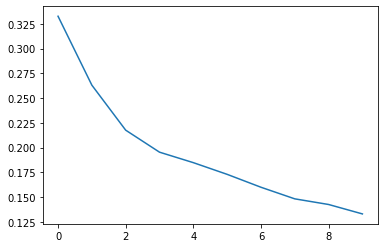

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen = max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix, Y_test)
print("Accuracy on test set", accr[1])
print("Loss on test set", accr[0])

23/23 [==============================] - 2s 32ms/step - loss: 0.2395 - acc: 0.9171
Accuracy on test set 0.917119562625885
Loss on test set 0.23954617977142334


In [ ]:
def eval(test, text_based_review = True):

  test2 = tokenizer.texts_to_sequences([test])
  test2_sequences_matrix = sequence.pad_sequences(test2, maxlen = max_len)
  
  predictions = model.predict(test2_sequences_matrix)

  if text_based_review == True:

    if predictions < 0.20:
      print("Küfür yok: ", predictions[0][0])
    
    else:
      print("Küfür içeriyor: ", predictions[0][0])

  else:
    return predictions[0][0]

In [ ]:
eval("ananızı sikeyim sizin")

Küfür içeriyor:  0.5105811


In [ ]:
eval("orospu çocukları")

Küfür içeriyor:  0.65853256


In [ ]:
eval("çok beğendim ancak teknik destek çok zayıf")

Küfür yok:  0.00046942243


In [ ]:
eval("siktirin gidin")

Küfür içeriyor:  0.2691592


In [ ]:
eval("kargoda kırıldı. bok gibi")

Küfür içeriyor:  0.24471454


In [ ]:
eval("amın oğlu")

Küfür yok:  0.19045442


In [ ]:
eval("Ananın amına çivi çakayım")

Küfür içeriyor:  0.37321842


In [ ]:
eval("amk")

Küfür içeriyor:  0.44443813


In [ ]:
eval("siktir")

Küfür içeriyor:  0.6256311


In [ ]:
eval("Siktir et boşver kardeşim bu herifler böyledir başka bir anlam aramana gerek yok anasını satayım şu saçmalığa bak")

Küfür yok:  0.1559345


In [ ]:
eval("Anasını satayım")

Küfür içeriyor:  0.2072866


In [ ]:
eval("Selam abi, iyi yayınlar")

Küfür yok:  0.021640968


In [ ]:
eval("Selam abi")

Küfür yok:  0.04360203


In [ ]:
eval("Nasılsınız?")

Küfür yok:  0.12438411


In [ ]:
eval("Selam")

Küfür yok:  0.062975876


In [ ]:
eval("abi")

Küfür yok:  0.10999751


In [ ]:
eval("Arkadaşlar özür dileyerek bölüyorum ama küfür işini biraz azaltsak daha iyi olur mu acaba.")

Küfür yok:  0.0010168789


In [ ]:
text = "Sorunlu kişiler başkalarının emeklerini araştırmalarını bunlar neticesinde elde ettiklerini kendi bulmuş kendi yapmış gibi ya da bunları ifşalayarak büyük bir iş becermiş gibi davranan insanlar hep vardı hepte olacaktır. Bunlara fazla takmamak lazım. Hamama giren terler gibi bir şey bu. Ha günün sonunda ( 🤣) insan da şevk istek kalmıyor o da ayrı bir durum. Üzüldüm başına gelen bu durum için @DD-A"
eval(text)

Küfür yok:  0.023795862


In [ ]:
eval("amına kodumun piçi")

Küfür içeriyor:  0.43906724


In [ ]:
eval("abi benim başıma gelmiyor ki, dc benim değil. biz açık bir ortam oluşturmaya çalıştık. insanların algıları yetmiyor anlamaya. (düzenlendi)")

Küfür yok:  1.2153032e-05
